In [2]:
# %pip install ultralytics

In [3]:
# %pip install scikit-learn

In [3]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from IPython.core.magic import register_line_cell_magic
import yaml
from PIL import Image
import os
import seaborn as sns
from ultralytics import YOLO
from matplotlib.patches import Rectangle
import glob
import cv2
import random

In [4]:
# Paths to your local directories
Input_path = r'C:\Users\Prashanth S\Downloads\Dataset-And-Output\css-data'
 # Replace with your path
Work_path = r'C:\Users\Prashanth S\Downloads\Dataset-And-Output\results_yolov8n_10e\kaggle\working'
 # Replace with your path

**Milestone 3**

# Evaluate Model's Performance

**Model**

In [5]:
model = YOLO(r'C:\Users\Prashanth S\Downloads\Dataset-And-Output\results_yolov8n_10e\kaggle\working\runs\detect\train\weights\best.pt')

**Train results**

In [6]:
def display_image(image, print_info = True, hide_axis = False):
    if isinstance(image, str):  # Check if it's a file path
        img = Image.open(image)
        plt.imshow(img)
    elif isinstance(image, np.ndarray):  # Check if it's a NumPy array
        image = image[..., ::-1]  # BGR to RGB
        img = Image.fromarray(image)
        plt.imshow(img)
    else:
        raise ValueError("Unsupported image format")

    if print_info:
        print('Type: ', type(img), '\n')
        print('Shape: ', np.array(img).shape, '\n')

    if hide_axis:
        plt.axis('off')

    plt.show()

In [7]:
results_paths = [
    i for i in
    glob.glob(r'C:\Users\Prashanth S\Downloads\Dataset-And-Output\results_yolov8n_10e\kaggle\working\runs\detect\train\*.png') +
    glob.glob(r'C:\Users\Prashanth S\Downloads\Dataset-And-Output\results_yolov8n_10e\kaggle\working\runs\detect\train\*.jpg')
    if 'batch' not in i
]

results_paths

['C:\\Users\\Prashanth S\\Downloads\\Dataset-And-Output\\results_yolov8n_10e\\kaggle\\working\\runs\\detect\\train\\confusion_matrix.png',
 'C:\\Users\\Prashanth S\\Downloads\\Dataset-And-Output\\results_yolov8n_10e\\kaggle\\working\\runs\\detect\\train\\F1_curve.png',
 'C:\\Users\\Prashanth S\\Downloads\\Dataset-And-Output\\results_yolov8n_10e\\kaggle\\working\\runs\\detect\\train\\PR_curve.png',
 'C:\\Users\\Prashanth S\\Downloads\\Dataset-And-Output\\results_yolov8n_10e\\kaggle\\working\\runs\\detect\\train\\P_curve.png',
 'C:\\Users\\Prashanth S\\Downloads\\Dataset-And-Output\\results_yolov8n_10e\\kaggle\\working\\runs\\detect\\train\\results.png',
 'C:\\Users\\Prashanth S\\Downloads\\Dataset-And-Output\\results_yolov8n_10e\\kaggle\\working\\runs\\detect\\train\\R_curve.png',
 'C:\\Users\\Prashanth S\\Downloads\\Dataset-And-Output\\results_yolov8n_10e\\kaggle\\working\\runs\\detect\\train\\labels.jpg',
 'C:\\Users\\Prashanth S\\Downloads\\Dataset-And-Output\\results_yolov8n_10e\\ka

C:\Users\Prashanth S\Downloads\Dataset-And-Output\results_yolov8n_10e\kaggle\working\runs\detect\train\F1_curve.png


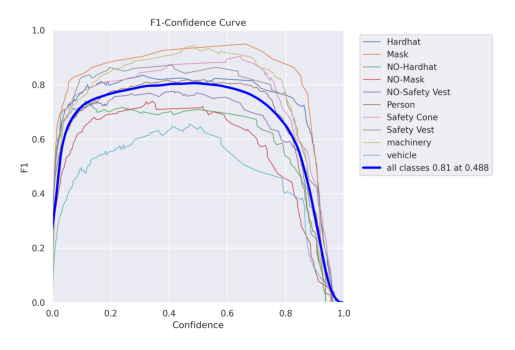



C:\Users\Prashanth S\Downloads\Dataset-And-Output\results_yolov8n_10e\kaggle\working\runs\detect\train\PR_curve.png


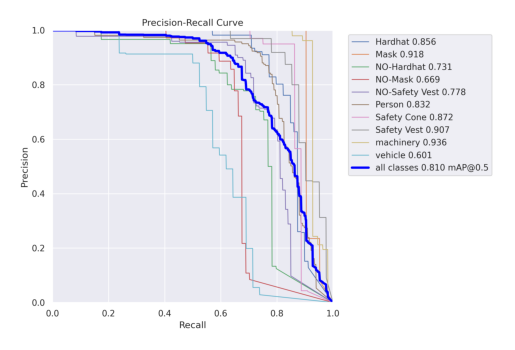



C:\Users\Prashanth S\Downloads\Dataset-And-Output\results_yolov8n_10e\kaggle\working\runs\detect\train\P_curve.png


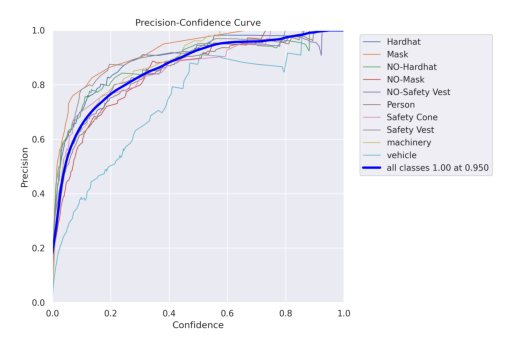



C:\Users\Prashanth S\Downloads\Dataset-And-Output\results_yolov8n_10e\kaggle\working\runs\detect\train\R_curve.png


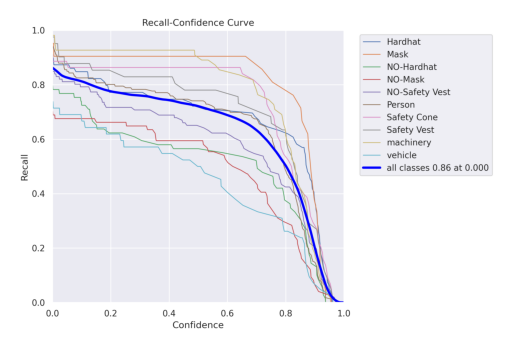



C:\Users\Prashanth S\Downloads\Dataset-And-Output\results_yolov8n_10e\kaggle\working\runs\detect\train\confusion_matrix.png


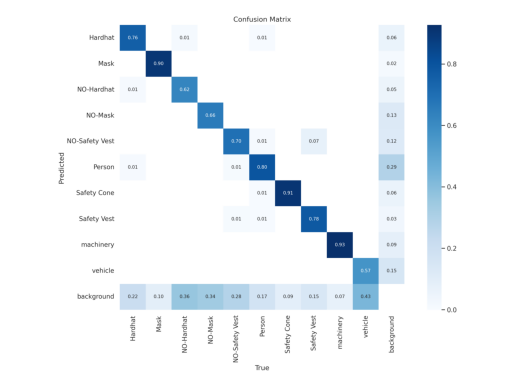



C:\Users\Prashanth S\Downloads\Dataset-And-Output\results_yolov8n_10e\kaggle\working\runs\detect\train\labels.jpg


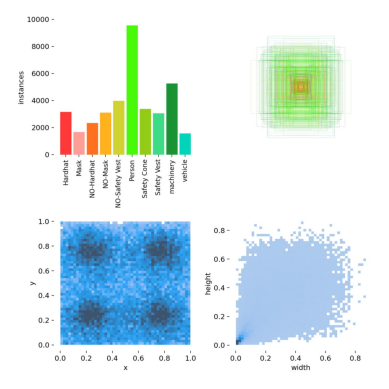



C:\Users\Prashanth S\Downloads\Dataset-And-Output\results_yolov8n_10e\kaggle\working\runs\detect\train\labels_correlogram.jpg


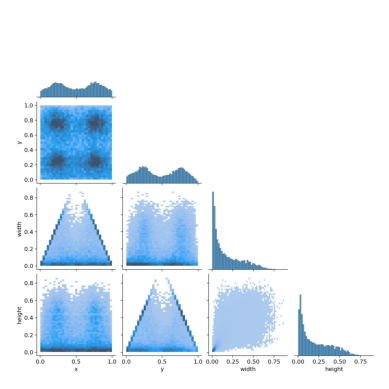



C:\Users\Prashanth S\Downloads\Dataset-And-Output\results_yolov8n_10e\kaggle\working\runs\detect\train\results.png


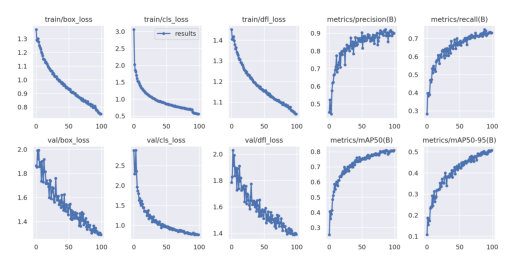

In [8]:
for file in sorted(results_paths):
    print(file)
    display_image(file, print_info = False, hide_axis = True)
    print('\n')

**Export**

In [ ]:
# Export the model
model.export(
    format = 'onnx', # openvino, onnx, engine, tflite
    imgsz = 640,
    half = False,
    int8 = False,
    simplify = False,
    nms = False,
)

**Loss**

In [9]:
df = pd.read_csv(r'C:\Users\Prashanth S\Downloads\Dataset-And-Output\results_yolov8n_10e\kaggle\working\runs\detect\train\results.csv')
df = df.rename(columns=lambda x: x.replace(" ", ""))
df.to_csv(f'{Work_path}training_log_df.csv', index=False)
df.head(20)

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,0,1.3671,3.0587,1.4515,0.45233,0.28235,0.25226,0.10691,1.8647,2.8809,1.7853,0.070184,0.003313,0.003313
1,1,1.2920,2.0202,1.4042,0.52367,0.39709,0.40548,0.18687,1.8527,2.2875,1.8273,0.040118,0.006580,0.006580
2,2,1.2834,1.8550,1.4067,0.47213,0.38174,0.35782,0.15425,1.9889,2.3773,2.0292,0.009987,0.009782,0.009782
3,3,1.3007,1.8044,1.4177,0.44319,0.39776,0.38913,0.18252,1.9192,2.8834,1.9127,0.009703,0.009703,0.009703
4,4,1.2760,1.7039,1.3969,0.57457,0.38950,0.41333,0.17268,1.9914,2.3586,1.9910,0.009703,0.009703,0.009703
5,5,1.2507,1.6073,1.3779,0.61794,0.46928,0.48568,0.23157,1.8551,1.9631,1.8355,0.009604,0.009604,0.009604
6,6,1.2350,1.5287,1.3584,0.62318,0.45904,0.51142,0.23886,1.8754,1.8641,1.8966,0.009505,0.009505,0.009505
7,7,1.2227,1.5164,1.3637,0.66330,0.47322,0.53597,0.23770,1.8917,1.7950,1.8874,0.009406,0.009406,0.009406
8,8,1.2023,1.4732,1.3425,0.66791,0.53394,0.58693,0.29238,1.7357,1.6263,1.7274,0.009307,0.009307,0.009307
9,9,1.1916,1.4223,1.3339,0.69358,0.50939,0.55235,0.24448,1.9004,1.6762,1.8905,0.009208,0.009208,0.009208


In [10]:
print('*'*50)
print('\nBest Training Box loss: ', df['train/box_loss'].min())
print('\nBest Validation Box loss: ', df['val/box_loss'].min())

print('='*50)
print('\nBest Training Cls loss: ', df['train/cls_loss'].min())
print('\nBest Validation Cls loss: ', df['val/cls_loss'].min())

print('='*50)
print('\nBest Training DFL loss: ', df['train/dfl_loss'].min())
print('\nBest Validation DFL loss: ', df['val/dfl_loss'].min())

**************************************************

Best Training Box loss:  0.74948

Best Validation Box loss:  1.291

Best Training Cls loss:  0.55902

Best Validation Cls loss:  0.7616

Best Training DFL loss:  1.0425

Best Validation DFL loss:  1.3878


**Validation results**

In [11]:
validation_results_paths = [
    i for i in
    glob.glob(r'C:\Users\Prashanth S\Downloads\Dataset-And-Output\results_yolov8n_10e\kaggle\working\runs\detect\train\*.png') +
    glob.glob(r'C:\Users\Prashanth S\Downloads\Dataset-And-Output\results_yolov8n_10e\kaggle\working\runs\detect\train\*.jpg')
    if 'val_batch' in i
]

len(validation_results_paths)

6

In [12]:
if len(validation_results_paths) >= 1:
    print(validation_results_paths[-1])

C:\Users\Prashanth S\Downloads\Dataset-And-Output\results_yolov8n_10e\kaggle\working\runs\detect\train\val_batch2_pred.jpg


C:\Users\Prashanth S\Downloads\Dataset-And-Output\results_yolov8n_10e\kaggle\working\runs\detect\train\val_batch1_labels.jpg


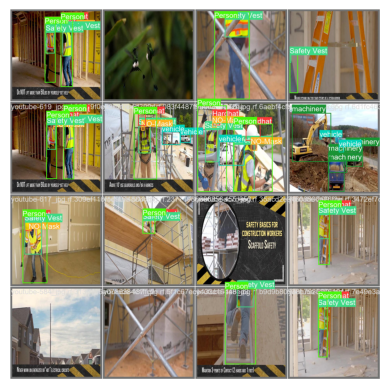

In [13]:
### check predictions or labels from a random validation batch
if len(validation_results_paths) >= 1:
    val_img_path = random.choice(validation_results_paths)
    print(val_img_path)
    display_image(val_img_path, print_info = False, hide_axis = True)